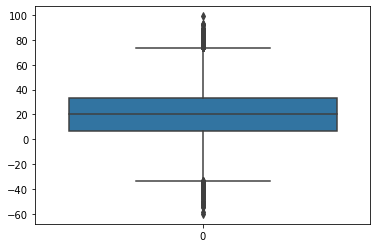

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = np.random.randn(50000) * 20 + 20
sns.boxplot(data=data)

# 基于统计学检测
## 1. 概述

统计学方法对数据的正常性做出假定。它们假定正常的数据对象由一个统计模型产生，而不遵守该模型 的数据是异常点。统计学方法的有效性高度依赖于对给定数据所做的统计模型假定是否成立。
异常检测的统计学方法的一般思想是:学习一个拟合给定数据集的生成模型，然后识别该模型低概率区
域中的对象，把它们作为异常点。

参数方法假定正常的数据对象被一个以 为参数的参数分布产生。该参数分布的概率密度函数 给 出对象 被该分布产生的概率。该值越小， 越可能是异常点。
非参数方法并不假定先验统计模型，而是试图从输入数据确定模型。非参数方法通常假定参数的个数和 性质都是灵活的，不预先确定(所以非参数方法并不是说模型是完全无参的，完全无参的情况下从数据 学习模型是不可能的)。

参数方法假定正常的数据对象被一个以  为参数的参数分布产生。该参数分布的概率密度函数f(x,  )给出对象x被该分布产生的概率。该值越小，x越可能是异常点。非参数方法并不假定先验统计模型，而是试图从输入数据确定模型。非参数方法通常假定参数的个数和性质都是灵活的，不预先确定（所以非参数方法并不是说模型是完全无参的，完全无参的情况下从数据学习模型是不可能的）。


# 2. 参数方法

## 2.1 Z-score

Z-score适用于正态分布单变量参数的场景，Z-score表示的是一个数据点距离其他数据群有多远。例如Z-score=2表示数据点距离均值2倍标准差远。使用Z-score方法时只需使用所有数据计算求出均值和标准差，再对观测点求出Z-score即可。



## 2.2 基于正态分布的一元异常点检测 

仅涉及一个属性或变量的数据称为一元数据。我们假定数据由正态分布产生，然后可以由输入数据学习正态分布的参数，并把低概率的点识别为异常点。

假定输入数据集为${x^{(1)}, x^{(2)}, ..., x^{(m)}}$，数据集中的样本服从正态分布，即$x^{(i)}\sim N(\mu, \sigma^2)$，我们可以根据样本求出参数$\mu$和$\sigma$。

$\mu=\frac 1m\sum_{i=1}^m x^{(i)}$

$\sigma^2=\frac 1m\sum_{i=1}^m (x^{(i)}-\mu)^2$

求出参数之后，我们就可以根据概率密度函数计算数据点服从该分布的概率。正态分布的概率密度函数为

$p(x)=\frac 1{\sqrt{2\pi}\sigma}exp(-\frac{(x-\mu)^2}{2\sigma^2})$

如果计算出来的概率低于阈值，就可以认为该数据点为异常点。

阈值是个经验值，可以选择在验证集上使得评估指标值最大（也就是效果最好）的阈值取值作为最终阈值。

例如常用的3sigma原则中，如果数据点超过范围$(\mu-3\sigma, \mu+3\sigma)$，那么这些点很有可能是异常点。

这个方法还可以用于可视化。箱线图对数据分布做了一个简单的统计可视化，利用数据集的上下四分位数（Q1和Q3）、中点等形成。异常点常被定义为小于Q1－1.5IQR或大于Q3+1.5IQR的那些数据。

## 2.3 箱线图和IQR
箱线图可以展示数据的分布情况，也能用来筛选异常点。

其中IQR等于数据集的75%分位值Q3和25分位值Q1的差值，一般我们将小于Q1-1.5IQR或大于Q3+1.5IQR的数据定义为异常点。



## 2.2 多元异常点检测

涉及两个或多个属性或变量的数据称为多元数据。许多一元异常点检测方法都可以扩充，用来处理多元数据。其核心思想是把多元异常点检测任务转换成一元异常点检测问题。例如基于正态分布的一元异常点检测扩充到多元情形时，可以求出每一维度的均值和标准差。对于第$j$维：

$\mu_j=\frac 1m\sum_{i=1}^m x_j^{(i)}$

$\sigma_j^2=\frac 1m\sum_{i=1}^m (x_j^{(i)}-\mu_j)^2$

计算概率时的概率密度函数为

$p(x)=\prod_{j=1}^n p(x_j;\mu_j,\sigma_j^2)=\prod_{j=1}^n\frac 1{\sqrt{2\pi}\sigma_j}exp(-\frac{(x_j-\mu_j)^2}{2\sigma_j^2})$

这是在各个维度的特征之间相互独立的情况下。如果特征之间有相关性，就要用到多元高斯分布了。

1.3 多个特征相关，且符合多元高斯分布

$\mu=\frac{1}{m}\sum^m_{i=1}x^{(i)}$

$\sum=\frac{1}{m}\sum^m_{i=1}(x^{(i)}-\mu)(x^{(i)}-\mu)^T$

$p(x)=\frac{1}{(2 \pi)^{\frac{n}{2}}|\Sigma|^{\frac{1}{2}}} \exp \left(-\frac{1}{2}(x-\mu)^{T} \Sigma^{-1}(x-\mu)\right)$


# 3.使用混合参数分布

在许多情况下假定数据是由正态分布产生的。当实际数据很复杂时，这种假定过于简单，可以假定数据是被混合参数分布产生的。





In [5]:
from pyod.models.hbos import HBOS
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize


In [18]:
contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

# 生成虚拟数据
X_train, y_train, X_test, y_test = \
    generate_data(n_train=n_train,
                  n_test=n_test,
                  n_features=2,
                  contamination=contamination,
                  random_state=36) # 这个数取越大，分类越不准确ROC越低

/Users/caroline/opt/anaconda3/lib/python3.8/site-packages/pyod/utils/data.py:185: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  warn('behaviour="old" is deprecated and will be removed '



On Training Data:
HBOS ROC:1.0, precision @ rank n:1.0

On Test Data:
HBOS ROC:1.0, precision @ rank n:1.0


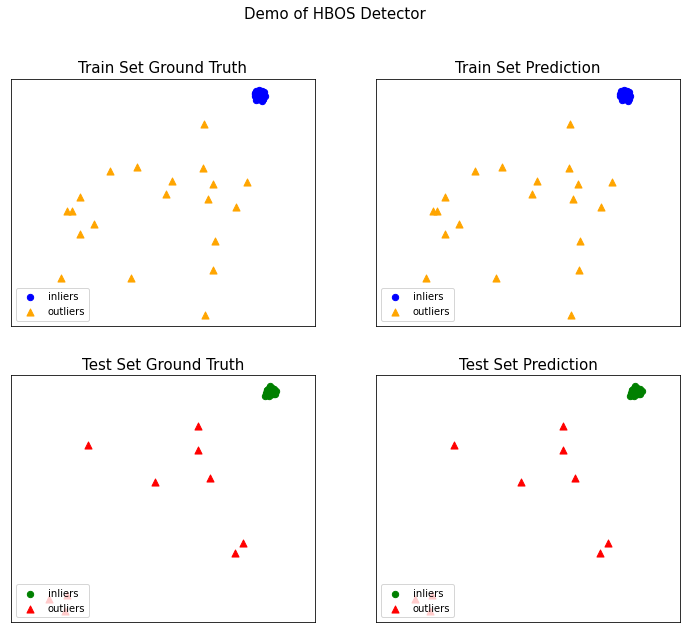

In [19]:
# 训练KNN模型
clf_name = 'HBOS'
clf = HBOS()
clf.fit(X_train) # 注意训练模型的时候，不需要输入y参数

# 得到训练标签和训练分数
y_train_pred = clf.labels_   # 0正常，1异常
y_train_scores = clf.decision_scores_  # 数值越大越异常

# 用训练好的模型预测测试数据的标签和分数
y_test_pred = clf.predict(X_test) 
y_test_scores = clf.decision_function(X_test)  

# 评估并打印结果
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

# 可视化模型效果
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=True)

In [21]:
# 模型调参发现使用默认参数的模型效果在测试集上不是特别理想，那么让我们来看一下HBOS方法中有哪些参数可以调整。 

class pyod.models.hbos.HBOS(n_bins=10, alpha=0.1, tol=0.5, contamination=0.1) 

# 其中这四个参数分别表示：n_bins：分箱的数量alpha：用于防止边缘溢出的正则项tol：
# 用于设置当数据点落在箱子外时的宽容度contamination：用于设置异常点的比例通过观察可视化结果，问题在于中心圆簇周围有些数据点被分错了，
# 考虑到该玩具数据集分布较为简单，因此确定了两种调参思路：减少n_bins数量减少alpha的正则项值经过验证发现，
# n_bins调整到6或alpha减少到0.001都可以获得更好的模型效果，其中在本案例中n_bins=6可以获得最佳的效果。



SyntaxError: invalid syntax (<ipython-input-21-c8e045c70a27>, line 3)